# Переобучение многочленов

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings("ignore")
#%matplotlib inline

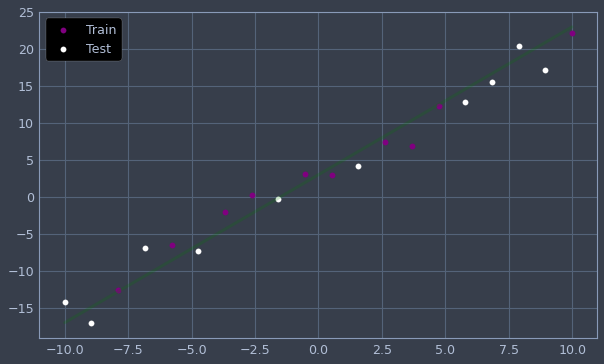

In [2]:
from jupyterthemes import jtplot

jtplot.style()
X = np.linspace(-10, 10, 20)
#print(X)

y = 2 * X + 3 + np.random.randn(20) * 3
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, label='Train', color='purple')
plt.scatter(X_test, y_test, label='Test', color='white')
plt.plot(X, 2 * X + 3, color='green', lw=3, alpha=0.2)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor('black')
legend_box.set_edgecolor('white')
plt.show()

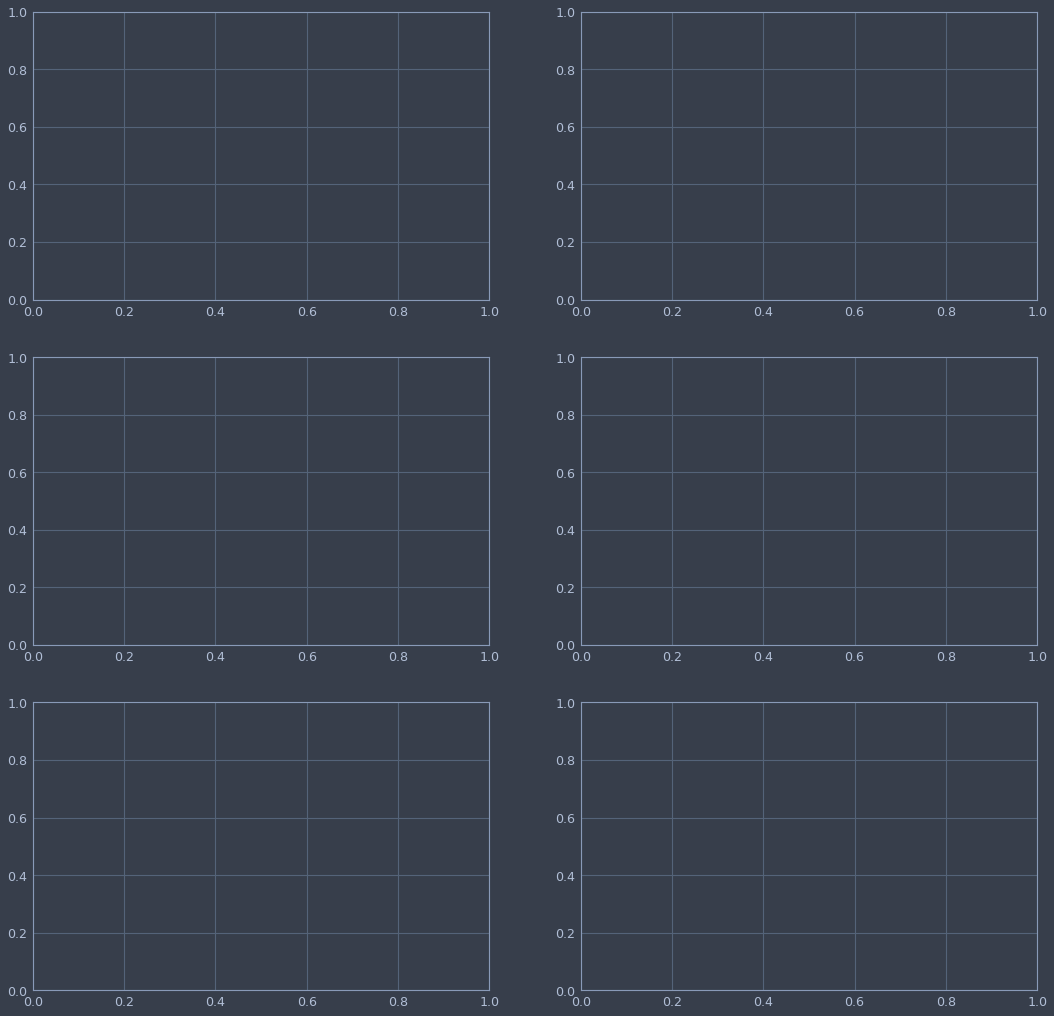

In [3]:
grid = np.linspace(-12, 12, 500)

fig, ax = plt.subplots(3, 2, figsize=(18, 18))

ax = ax.ravel()

for i, deg in enumerate([1, 3, 4, 7, 9, 20]):
    poly = np.polyfit


In [12]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=', ')

In [ ]:
# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss hours-per-week native-country salary')

numeric_indices = np.array([0, 2, 4, 10, 11, 12])
categorical_indices = np.array([1, 3, 5, 6, 7, 8, 9, 13])

df.columns = columns.split()
df.columns